COS 802 Final Project <br> Student Number: u11028182 <br> Name:  Erika Scholtz

#### Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

C:\Users\erika.scholtz\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\__init__.py:149: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.16.4
  UserWarning)


#### Load labeled topics for each country

In [3]:
filepath = "C:/Users/erika.scholtz/OneDrive - Entelect Software (Pty) Ltd/Masters/COS 802/Project/Labeled Country Topics"

all_files = glob.glob(os.path.join(filepath,"*.csv"))
topics = pd.concat((pd.read_csv(f) for f in all_files))

#### Perform cosine similarity to find similarities between topics

In [4]:
docs = []
for i in topics.CountryTopic.unique():
    df = topics[topics['CountryTopic']==i]
    words = []
    for j in df.Word:
        words.append(j)
    words_new = " ".join(words)
    docs.append(words_new)

In [5]:
tfidf = TfidfVectorizer()
tfidf_X = tfidf.fit_transform(docs)

In [6]:
cosine_sim = cosine_similarity(tfidf_X,tfidf_X)
np.fill_diagonal(cosine_sim,val=0)

#### Create similarity dataframe for analysis

In [7]:
columns = list(topics.CountryTopic.unique())
df_sim = pd.DataFrame(cosine_sim,columns=columns)
df_sim['Topics'] = columns
df_sim = df_sim.set_index('Topics')
df_sim.to_csv('TopicSimilarity.csv')

df_sim.head()

,AU_1,AU_2,AU_3,AU_4,AU_5,AU_6,AU_7,AU_8,AU_9,AU_10,...,ZA_13,ZA_14,ZA_15,ZA_16,ZA_17,ZA_18,ZA_19,ZA_20,ZA_21,ZA_22
Topics,,,,,,,,,,,,,,,,,,,,,
AU_1,0.000000,0.072176,0.022706,0.045591,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,...,0.123070,0.036283,0.000000,0.000000,0.000000,0.040656,0.000000,0.000000,0.056610,0.0
AU_2,0.072176,0.000000,0.058866,0.070394,0.000000,0.000000,0.064219,0.000000,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.147401,0.031195,0.000000,0.000000,0.033264,0.060349,0.0
AU_3,0.022706,0.058866,0.000000,0.000000,0.000000,0.033197,0.000000,0.044983,0.00000,0.00000,...,0.000000,0.000000,0.000000,0.096335,0.000000,0.000000,0.000000,0.000000,0.018986,0.0
AU_4,0.045591,0.070394,0.000000,0.000000,0.114716,0.114617,0.027649,0.038512,0.03384,0.02596,...,0.079208,0.025421,0.023559,0.000000,0.000000,0.117134,0.081801,0.000000,0.000000,0.0
AU_5,0.000000,0.000000,0.000000,0.114716,0.000000,0.000000,0.000000,0.034232,0.00000,0.02594,...,0.024814,0.025402,0.023540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


# Analyse topic similarities between countries

#### United States compared with United Kingdom

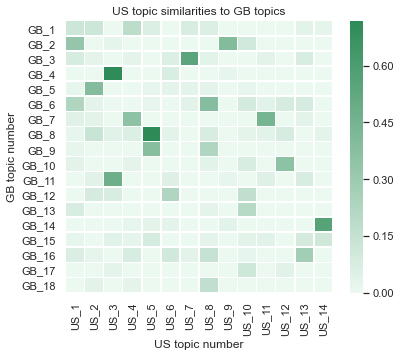

In [35]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[38:56,76:90], linewidth=0.5,cmap=colour)

plt.title('US topic similarities to GB topics')
plt.xlabel('US topic number')
plt.ylabel('GB topic number')

plt.savefig('US_GB_Sim.png',bbox_inches = 'tight')

#### United States compared with India

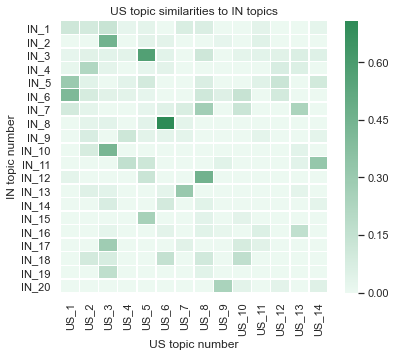

In [36]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[56:76,76:90], linewidth=0.5,cmap=colour)

plt.title('US topic similarities to IN topics')
plt.xlabel('US topic number')
plt.ylabel('IN topic number')

plt.savefig('US_IN_Sim.png',bbox_inches = 'tight')

#### United States compared with India

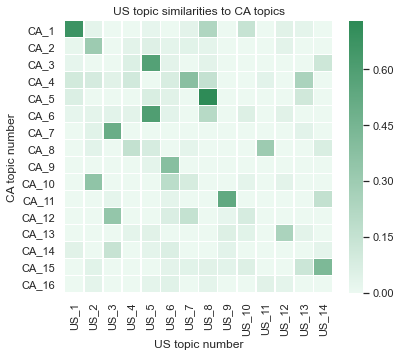

In [37]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[22:38,76:90], linewidth=0.5,cmap=colour)

plt.title('US topic similarities to CA topics')
plt.xlabel('US topic number')
plt.ylabel('CA topic number')

plt.savefig('US_CA_Sim.png',bbox_inches = 'tight')

#### United States compared with Australia

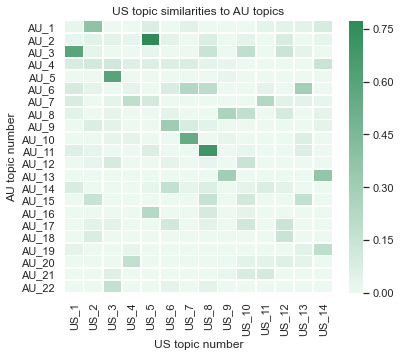

In [38]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[0:22,76:90], linewidth=0.5,cmap=colour)

plt.title('US topic similarities to AU topics')
plt.xlabel('US topic number')
plt.ylabel('AU topic number')

plt.savefig('US_AU_Sim.png',bbox_inches = 'tight')

#### United States compared with South Africa

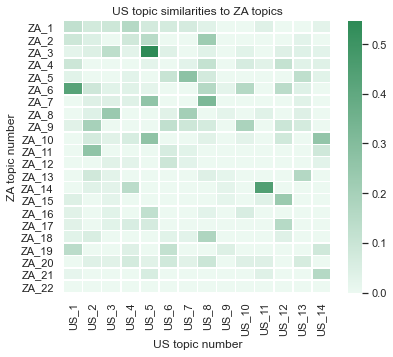

In [39]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[90:,76:90], linewidth=0.5,cmap=colour)

plt.title('US topic similarities to ZA topics')
plt.xlabel('US topic number')
plt.ylabel('ZA topic number')

plt.savefig('US_ZA_Sim.png',bbox_inches = 'tight')

#### United Kingdom compared with India

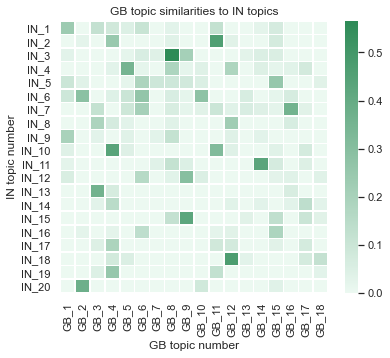

In [40]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[56:76,38:56], linewidth=0.5,cmap=colour)

plt.title('GB topic similarities to IN topics')
plt.xlabel('GB topic number')
plt.ylabel('IN topic number')

plt.savefig('GB_IN_Sim.png',bbox_inches = 'tight')

#### Canada compared with United Kingdom

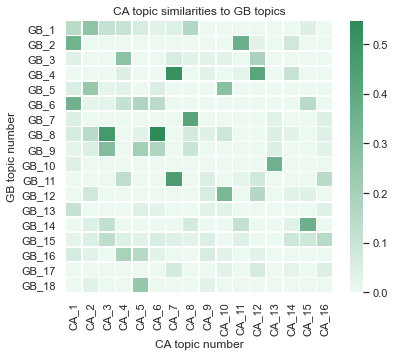

In [41]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[38:56,22:38], linewidth=0.5,cmap=colour)

plt.title('CA topic similarities to GB topics')
plt.xlabel('CA topic number')
plt.ylabel('GB topic number')

plt.savefig('CA_GB_Sim.png',bbox_inches = 'tight')

#### United Kingdom compared with Australia

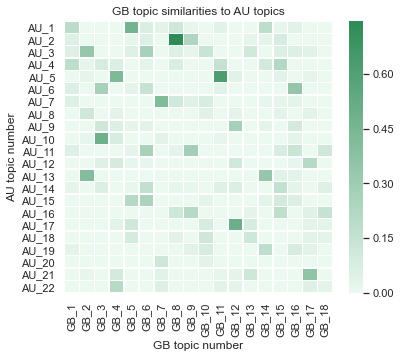

In [42]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[0:22,38:56], linewidth=0.5,cmap=colour)

plt.title('GB topic similarities to AU topics')
plt.xlabel('GB topic number')
plt.ylabel('AU topic number')

plt.savefig('GB_AU_Sim.png',bbox_inches = 'tight')

#### United Kingdom compared with South Africa

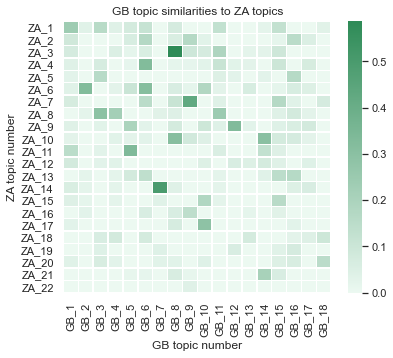

In [43]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[90:,38:56], linewidth=0.5,cmap=colour)

plt.title('GB topic similarities to ZA topics')
plt.xlabel('GB topic number')
plt.ylabel('ZA topic number')

plt.savefig('GB_ZA_Sim.png',bbox_inches = 'tight')

#### Canada compared with India

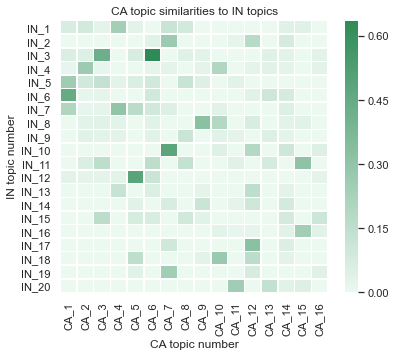

In [44]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[56:76,22:38], linewidth=0.5,cmap=colour)

plt.title('CA topic similarities to IN topics')
plt.xlabel('CA topic number')
plt.ylabel('IN topic number')

plt.savefig('CA_IN_Sim.png',bbox_inches = 'tight')

#### India compared with Australia

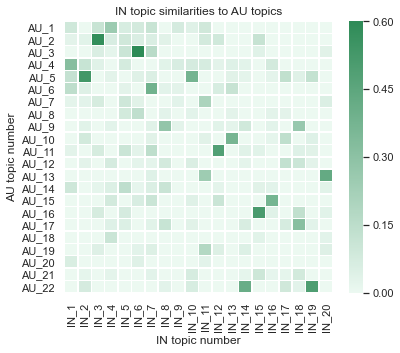

In [45]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[0:22,56:76], linewidth=0.5,cmap=colour)

plt.title('IN topic similarities to AU topics')
plt.xlabel('IN topic number')
plt.ylabel('AU topic number')

plt.savefig('IN_AU_Sim.png',bbox_inches = 'tight')

#### India compared with South Africa

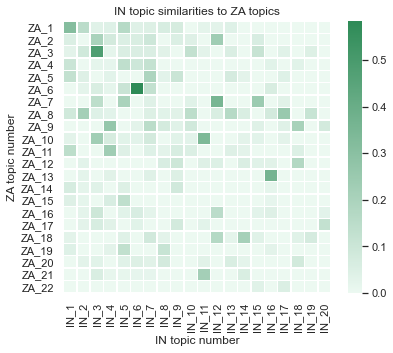

In [46]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[90:,56:76], linewidth=0.5,cmap=colour)

plt.title('IN topic similarities to ZA topics')
plt.xlabel('IN topic number')
plt.ylabel('ZA topic number')

plt.savefig('IN_ZA_Sim.png',bbox_inches = 'tight')

#### Canada compared with Australia

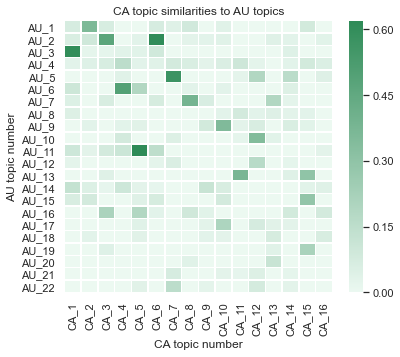

In [47]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[0:22,22:38], linewidth=0.5,cmap=colour)

plt.title('CA topic similarities to AU topics')
plt.xlabel('CA topic number')
plt.ylabel('AU topic number')

plt.savefig('CA_AU_Sim.png',bbox_inches = 'tight')

#### Canada compared with South Africa

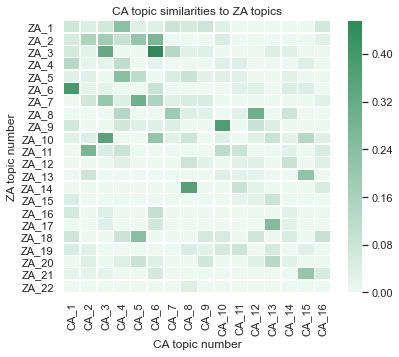

In [48]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[90:,22:38], linewidth=0.5,cmap=colour)

plt.title('CA topic similarities to ZA topics')
plt.xlabel('CA topic number')
plt.ylabel('ZA topic number')

plt.savefig('CA_ZA_Sim.png',bbox_inches = 'tight')

#### Australia compared with South Africa

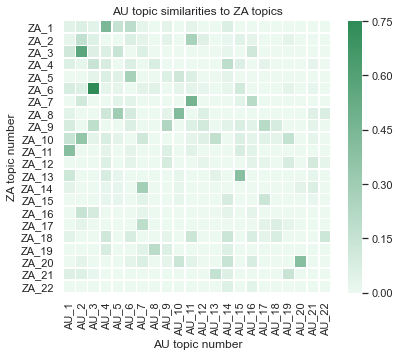

In [49]:
sns.set(font_scale = 1.0)
plt.figure(figsize=(6,5))
plt.tight_layout
colour = sns.light_palette("seagreen", as_cmap=True)

ax = sns.heatmap(df_sim.iloc[90:,0:22], linewidth=0.5,cmap=colour)

plt.title('AU topic similarities to ZA topics')
plt.xlabel('AU topic number')
plt.ylabel('ZA topic number')

plt.savefig('AU_ZA_Sim.png',bbox_inches = 'tight')